In [16]:
import numpy as np
import pandas as pd
import Thermobar as pt
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import warnings as w
pd.options.display.max_columns = None

In [17]:

plt.rcParams["font.family"] = 'arial'
plt.rcParams["font.size"] =12
plt.rcParams["mathtext.default"] = "regular"
plt.rcParams["mathtext.fontset"] = "dejavusans"
plt.rcParams['patch.linewidth'] = 1
plt.rcParams['axes.linewidth'] = 1
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["xtick.major.size"] = 6 # Sets length of ticks
plt.rcParams["ytick.major.size"] = 4 # Sets length of ticks
plt.rcParams["ytick.labelsize"] = 12 # Sets size of numbers on tick marks
plt.rcParams["xtick.labelsize"] = 12 # Sets size of numbers on tick marks
plt.rcParams["axes.titlesize"] = 14 # Overall title
plt.rcParams["axes.labelsize"] = 14 # Axes labels

In [18]:
out=pt.import_excel(r'../LEPR_Wet_Stitched_April2023_Norm100Anhydrs.xlsx', sheet_name='Cpx-Opx')
myOpxs1=out['Opxs']
myCpxs1=out['Cpxs']
myLiqs1=out['Liqs']
Opx_Cpx=out['my_input']

notinLEPR= Opx_Cpx['Citation_x'].str.contains('LEPR')
notinKeith=(Opx_Cpx['Citation_x'].str.contains('noexclude'))
newMask=~notinLEPR
newMask=newMask.fillna(False)

mask_1GPa=Opx_Cpx['P_kbar_x']<200
mask_1GPa=mask_1GPa.fillna(False)

Press_new=mask_1GPa&newMask
Press_new=Press_new.fillna(False)

eq_tests=pt.calculate_cpx_opx_eq_tests(cpx_comps=myCpxs1, opx_comps=myOpxs1)
Quad_Opx=eq_tests['Ca_Opx_cat_6ox']/(eq_tests['Ca_Opx_cat_6ox']+eq_tests['Mg_Opx_cat_6ox']+eq_tests['Fet_Opx_cat_6ox'])
Quad_Cpx=eq_tests['Ca_Cpx_cat_6ox']/(eq_tests['Ca_Cpx_cat_6ox']+eq_tests['Mg_Cpx_cat_6ox']+eq_tests['Fet_Cpx_cat_6ox'])



In [19]:
sum(Press_new)

109

# Equilibrium test plots
- Equilibrium tests weird Kd, because Cpx_Lq KD is a function of T, nd Opx-liq Kd is a function of Xsi, so both influence Cpx-Opx Kd. 

In [20]:
# myLiquids_Fe3_Kress=pt.convert_fo2_to_fe_partition(liq_comps=myLiqs1, T_K=Opx_Cpx['T_K_x'], 
#                                           P_kbar=Opx_Cpx['P_kbar_x'], fo2=10**(Opx_Cpx['logfo2']), model="Kress1991", 
#                                                    renorm=True)

# #myLiquids_Fe3_Kress['Fe3Fet_Liq'].loc[Opx_Cpx['logfo2']==0]=0


KdMeas_Cpx=pt.calculate_clinopyroxene_liquid_components(cpx_comps=myCpxs1, liq_comps=myLiqs1)
KdMeas_Opx=pt.calculate_orthopyroxene_liquid_components(opx_comps=myOpxs1, liq_comps=myLiqs1)
Kd_FeMg_Cpx_Liq=np.exp(-0.107 - 1719 / Opx_Cpx['T_K_x'])
IdealKd=Kd_FeMg_Cpx_Liq/KdMeas_Opx['Ideal_Kd']

#Eq_Mask=abs(eq_tests['Kd_Fe_Mg_Cpx_Opx']-IdealKd)<0.3
Eq_Mask=Quad_Opx<0.06
xT=Opx_Cpx['T_K_x'].loc[Press_new&Eq_Mask]
x=Opx_Cpx['P_kbar_x'].loc[Press_new&Eq_Mask]

In [21]:
KdMeas_Opx['Ideal_Kd']

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
297   NaN
298   NaN
299   NaN
300   NaN
301   NaN
Name: Ideal_Kd, Length: 302, dtype: float64

In [22]:
eq_tests

,High T Kd Eq?,Low T Kd Eq?,SiO2_Cpx,TiO2_Cpx,Al2O3_Cpx,FeOt_Cpx,MnO_Cpx,MgO_Cpx,CaO_Cpx,Na2O_Cpx,K2O_Cpx,Cr2O3_Cpx,Sample_ID_Cpx,Si_Cpx_cat_6ox,Mg_Cpx_cat_6ox,Fet_Cpx_cat_6ox,Ca_Cpx_cat_6ox,Al_Cpx_cat_6ox,Na_Cpx_cat_6ox,K_Cpx_cat_6ox,Mn_Cpx_cat_6ox,Ti_Cpx_cat_6ox,Cr_Cpx_cat_6ox,oxy_renorm_factor,Al_IV_cat_6ox,Al_VI_cat_6ox,En_Simple_MgFeCa_Cpx,Fs_Simple_MgFeCa_Cpx,Wo_Simple_MgFeCa_Cpx,Cation_Sum_Cpx,Ca_CaMgFe,Lindley_Fe3_Cpx,Lindley_Fe2_Cpx,Lindley_Fe3_Cpx_prop,CrCaTs,a_cpx_En,Mgno_Cpx,Jd,"Jd_from 0=Na, 1=Al",CaTs,CaTi,DiHd_1996,EnFs,DiHd_2003,Di_Cpx,FeIII_Wang21,FeII_Wang21,SiO2_Opx,TiO2_Opx,Al2O3_Opx,FeOt_Opx,MnO_Opx,MgO_Opx,CaO_Opx,Na2O_Opx,K2O_Opx,Cr2O3_Opx,Sample_ID_Opx,Si_Opx_cat_6ox,Mg_Opx_cat_6ox,Fet_Opx_cat_6ox,Ca_Opx_cat_6ox,Al_Opx_cat_6ox,Na_Opx_cat_6ox,K_Opx_cat_6ox,Mn_Opx_cat_6ox,Ti_Opx_cat_6ox,Cr_Opx_cat_6ox,oxy_renorm_factor_opx,Al_IV_Opx_cat_6ox,Al_VI_Opx_cat_6ox,Si_Ti_Opx_cat_6ox,En_Simple_MgFeCa_Opx,Fs_Simple_MgFeCa_Opx,Wo_Simple_MgFeCa_Opx,Cation_Sum_Opx,Ca_CaMgFe,NaAlSi2O6,FmTiAlSiO6,CrAl2SiO6,FmAl2SiO6,CaFmSi2O6,Fm2Si2O6,En_Opx,Di_Opx,Mgno_OPX,En,Kd_Fe_Mg_Cpx_Opx,Lindley_Fe3_Opx,a_Di_cpx,Kf,a_En_opx_mod
0,Y,Y,48.799999,0.64,6.53,16.200001,0.50,10.10,16.40,0.64,0.07,0.00,0,1.860560,0.574056,0.516529,0.669948,0.293423,0.047310,0.003405,0.016147,0.018354,0.000000,0.0,0.139440,0.153983,0.326069,0.293394,0.380537,3.999731,0.380537,0.000000,0.516529,0.000000,0.000000,0.231272,0.526366,0.047310,0,0.106674,0.016383,0.546891,0.271847,0.546891,0.283669,-0.003942,0.520472,48.599998,0.31,5.90,26.40,0.72,15.700000,1.79,0.07,0.05,0.00,0,1.866751,0.898997,0.848028,0.073668,0.267091,0.005213,0.002450,0.023424,0.008957,0.000000,0.0,0.133249,0.133842,1.875708,0.493767,0.465772,0.040461,3.994579,0.040461,0.005213,0.008957,0.000000,0.128629,0.073668,0.779598,0.395864,0.037407,0.514579,0.489537,0.953870,0.000000,0.523930,0.223200,0.203733
1,Y,Y,53.320000,0.48,2.25,5.920000,0.15,16.91,20.73,0.28,0.00,0.12,1,1.947746,0.920861,0.180851,0.811362,0.096868,0.019831,0.000000,0.004641,0.013189,0.003466,0.0,0.052254,0.044614,0.481352,0.094534,0.424114,3.998814,0.424114,0.000000,0.180851,0.000000,0.001733,0.158665,0.835841,0.019831,0,0.024783,0.013736,0.771110,0.165301,0.771110,0.641826,-0.002372,0.183222,56.320000,0.13,1.41,10.17,0.26,30.879999,1.05,0.02,0.00,0.16,1,1.971271,1.611274,0.297687,0.039377,0.058165,0.001357,0.000000,0.007708,0.003423,0.004427,0.0,0.028729,0.029435,1.974693,0.826999,0.152790,0.020211,3.994689,0.020211,0.001357,0.003423,0.004427,0.023651,0.039377,0.925110,0.777706,0.033103,0.844054,0.829605,1.063003,0.000000,0.585107,0.208745,0.652532
2,Y,Y,51.060001,0.62,3.16,6.180000,0.12,15.78,20.82,0.27,0.00,0.01,2,1.914576,0.882079,0.193792,0.836461,0.139648,0.019629,0.000000,0.003811,0.017487,0.000296,0.0,0.085424,0.054224,0.461258,0.101338,0.437404,4.007779,0.437404,0.015559,0.178233,0.080287,0.000148,0.132428,0.819869,0.019629,0,0.034595,0.025415,0.776303,0.149784,0.776303,0.634224,0.015559,0.178233,55.150002,0.17,1.19,10.21,0.22,29.990000,1.66,0.03,0.00,0.15,2,1.968730,1.595973,0.304805,0.063492,0.050066,0.002076,0.000000,0.006652,0.004565,0.004233,0.0,0.031270,0.018796,1.973295,0.812502,0.155175,0.032324,4.000594,0.032324,0.002076,0.004565,0.004233,0.012486,0.063492,0.913443,0.764291,0.053125,0.839637,0.812807,1.150356,0.001187,0.601746,0.388240,0.636705
3,Y,Y,51.990002,0.61,2.81,6.570000,0.14,16.35,20.26,0.28,0.00,0.21,3,1.924600,0.902292,0.203396,0.803588,0.122598,0.020097,0.000000,0.004390,0.016986,0.006146,0.0,0.075400,0.047198,0.472583,0.106530,0.420886,4.004091,0.420886,0.008182,0.195214,0.040226,0.003073,0.163194,0.816041,0.020097,0,0.027101,0.024149,0.749264,0.178212,0.749264,0.609016,0.008182,0.195214,55.200001,0.14,0.77,11.92,0.26,29.320000,1.41,0.01,0.00,0.15,3,1.976509,1.565065,0.356937,0.054094,0.032494,0.000694,0.000000,0.007885,0.003771,0.004246,0.0,0.023491,0.009004,1.980280,0.791998,0.180628,0.027374,4.001697,0.027374,0.000694,0.003771,0.004246,0.004063,0.054094,0.933980,0.757422,0.043868,0.814284,

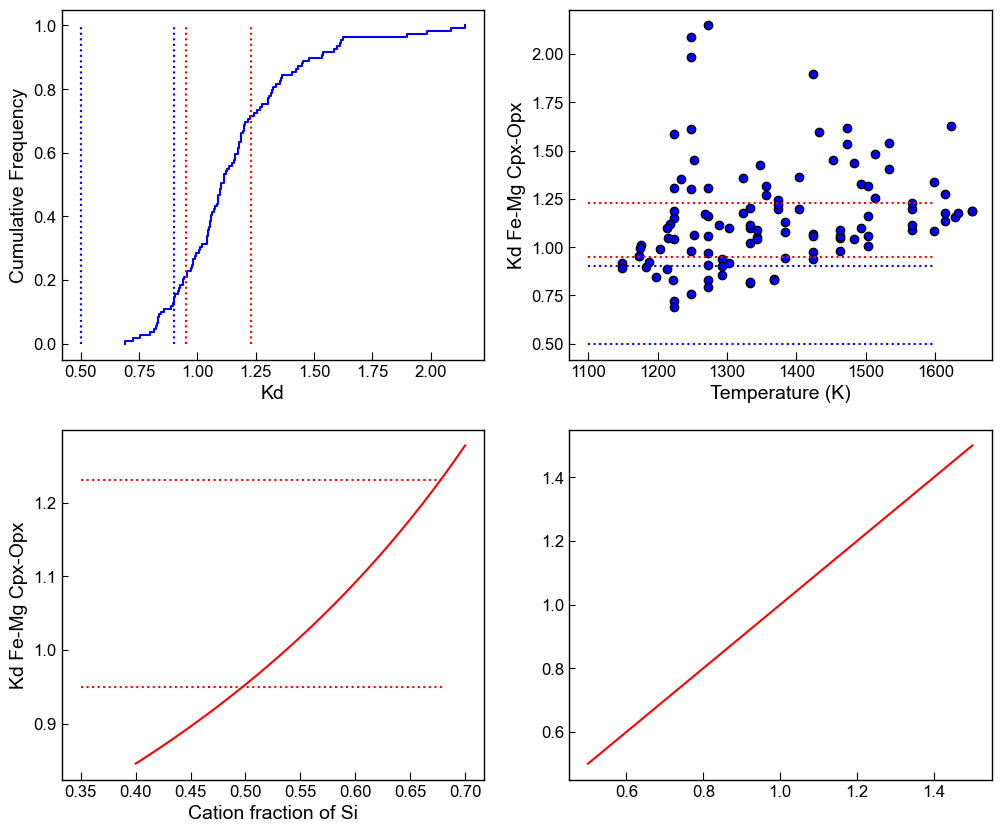

In [23]:
b=1.5
Kd_Sorted=np.sort(abs(eq_tests['Kd_Fe_Mg_Cpx_Opx'].loc[Press_new&Eq_Mask]))
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (12,10))
ax1.step(np.concatenate([Kd_Sorted, Kd_Sorted[[-1]]]),
         np.arange(Kd_Sorted.size+1)/Kd_Sorted.size, color='blue', linewidth=b)

ax1.plot([1.09+0.14, 1.09+0.14], [0, 1], ':r')
ax1.plot([1.09-0.14, 1.09-0.14], [0, 1], ':r')
ax1.plot([0.7+0.2, 0.7+0.2], [0, 1], ':b')
ax1.plot([0.7-0.2, 0.7-0.2], [0, 1], ':b')

# ax1.set_xlim([0, 1.2])
# ax1.set_ylim([0, 1])
ax1.set_xlabel('Kd')
ax1.set_ylabel('Cumulative Frequency')
ax2.plot(Opx_Cpx['T_K_x'].loc[Press_new&Eq_Mask], 
eq_tests['Kd_Fe_Mg_Cpx_Opx'].loc[Press_new&Eq_Mask], 'ok', mfc='blue')
ax2.plot(Opx_Cpx['T_K_x'], IdealKd, '.r')
ax2.plot([1100, 1600], [1.09+0.14, 1.09+0.14], ':r')
ax2.plot([1100, 1600], [1.09-0.14, 1.09-0.14], ':r')
ax2.plot([1100, 1600], [0.7+0.2, 0.7+0.2], ':b')
ax2.plot([1100, 1600], [0.7-0.2, 0.7-0.2], ':b')
ax2.set_xlabel('Temperature (K)')
ax2.set_ylabel('Kd Fe-Mg Cpx-Opx')

ax3.plot(KdMeas_Opx['Si_Liq_cat_frac'].loc[Press_new&Eq_Mask], eq_tests['Kd_Fe_Mg_Cpx_Opx'].loc[Press_new&Eq_Mask], 'ok', mfc='blue')
ax3.plot([0.35, 0.68], [1.09+0.14, 1.09+0.14], ':r')
ax3.plot([0.35, 0.68], [1.09-0.14, 1.09-0.14], ':r')
xSi=np.linspace(0.4, 0.7, 100)
Kd_calc_si=0.4805 - 0.3733*xSi
ax3.plot(xSi, 0.28/Kd_calc_si, '-r')
ax3.set_xlabel('Cation fraction of Si')
ax3.set_ylabel('Kd Fe-Mg Cpx-Opx')


ax4.plot(IdealKd.loc[Press_new&Eq_Mask], 
          eq_tests['Kd_Fe_Mg_Cpx_Opx'].loc[Press_new&Eq_Mask], 'ok', mfc='blue')
ax4.plot([0.5, 1.5], [0.5, 1.5], '-r')

fig.savefig('Eq_Tests_new_data_Opx_Cpx.png', dpi=100)


## Perform calculations, then filter by equilibrium etc. 

In [24]:
# Equation 36 is P-dependent
# Equation 37 is P dependent

# Equation 38 is T independent, for Mg#>0.68
# Equatoin 39 is T dependent

In [25]:
import warnings as w
with w.catch_warnings():
    w.simplefilter('ignore')
    # Wood and 39
    Out_39_Wood1973=pt.calculate_cpx_opx_press_temp(cpx_comps=myCpxs1, opx_comps=myOpxs1, equationP="P_Put2008_eq39", equationT="T_Wood1973")
    y_39_Wood1973=Out_39_Wood1973.loc[Press_new&(Eq_Mask)]
    Eq_39_Wood1973=pt.calculate_R2(x, y_39_Wood1973['P_kbar_calc']) # 39 Fixed T
    TEq_39_Wood1973=pt.calculate_R2(xT, y_39_Wood1973['T_K_calc']) # 39 Fixed T
    
    Out_39_Wells1977=pt.calculate_cpx_opx_press_temp(cpx_comps=myCpxs1, opx_comps=myOpxs1, equationP="P_Put2008_eq39", equationT="T_Wells1977")
    y_39_Wells1977=Out_39_Wells1977.loc[Press_new&(Eq_Mask)]
    Eq_39_Wells1977=pt.calculate_R2(x, y_39_Wells1977['P_kbar_calc']) # 39 Fixed T
    TEq_39_Wells1977=pt.calculate_R2(xT, y_39_Wells1977['T_K_calc']) # 39 Fixed T    
    
    # Equation 36 and equation 39 (for Mg#>0.68)
   
    Out_39_36=pt.calculate_cpx_opx_press_temp(cpx_comps=myCpxs1, opx_comps=myOpxs1, 
                        equationP="P_Put2008_eq39", equationT="T_Put2008_eq36", eq_tests=True)
    y_39_36=Out_39_36.loc[Press_new&(Eq_Mask)]
    Eq_39_36=pt.calculate_R2(x, y_39_36['P_kbar_calc']) # 39 Fixed T
    TEq_39_36=pt.calculate_R2(xT, y_39_36['T_K_calc']) # 39 Fixed T
    
    # Equation 37 and equation 39 (for Mg#<0.68)
    
    Out_39_37=pt.calculate_cpx_opx_press_temp(cpx_comps=myCpxs1, opx_comps=myOpxs1, equationP="P_Put2008_eq39", equationT="T_Put2008_eq37")
    y_39_37=Out_39_37.loc[Press_new&(Eq_Mask)]
    Eq_39_37=pt.calculate_R2(x, y_39_37['P_kbar_calc']) # 39 Fixed T
    TEq_39_37=pt.calculate_R2(xT, y_39_37['T_K_calc']) # 39 Fixed T 
    
    
    Out_39_Brey1990=pt.calculate_cpx_opx_press_temp(cpx_comps=myCpxs1, opx_comps=myOpxs1, equationP="P_Put2008_eq39", equationT="T_Brey1990")
    y_39_Brey1990=Out_39_Brey1990.loc[Press_new&(Eq_Mask)]
    Eq_39_Brey1990=pt.calculate_R2(x, y_39_Brey1990['P_kbar_calc']) # 39 Fixed T
    TEq_39_Brey1990=pt.calculate_R2(xT, y_39_Brey1990['T_K_calc']) # 39 Fixed T
    
    
    Out_38_36=pt.calculate_cpx_opx_press_temp(cpx_comps=myCpxs1, opx_comps=myOpxs1, equationP="P_Put2008_eq38", equationT="T_Put2008_eq36")
    y_38_36=Out_38_36.loc[Press_new&(Eq_Mask)]
    Eq_38_36=pt.calculate_R2(x, y_38_36['P_kbar_calc']) # 38 Fixed T
    TEq_38_36=pt.calculate_R2(xT, y_38_36['T_K_calc']) # 38 Fixed T
    
    # Equation 37 and equation 38 (for Mg#<0.68)
    
    Out_38_37=pt.calculate_cpx_opx_press_temp(cpx_comps=myCpxs1, opx_comps=myOpxs1, equationP="P_Put2008_eq38", equationT="T_Put2008_eq37")
    y_38_37=Out_38_37.loc[Press_new&(Eq_Mask)]
    Eq_38_37=pt.calculate_R2(x, y_38_37['P_kbar_calc']) # 38 Fixed T
    TEq_38_37=pt.calculate_R2(xT, y_38_37['T_K_calc']) # 38 Fixed T 
    
    
    Out_38_Brey1990=pt.calculate_cpx_opx_press_temp(cpx_comps=myCpxs1, opx_comps=myOpxs1, equationP="P_Put2008_eq38", equationT="T_Brey1990")
    y_38_Brey1990=Out_38_Brey1990.loc[Press_new&(Eq_Mask)]
    Eq_38_Brey1990=pt.calculate_R2(x, y_38_Brey1990['P_kbar_calc']) # 38 Fixed T
    TEq_38_Brey1990=pt.calculate_R2(xT, y_38_Brey1990['T_K_calc']) # 38 Fixed T
    
    


Youve selected a P-independent function
Youve selected a P-independent function


In [26]:
HighCpxMgno=Out_39_36['Mgno_Cpx']>0.68 # (Out_39_36['Cr2O3_Cpx']>0) &  (Out_39_36['Cr2O3_Opx']>0)

In [27]:
IdealKd

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
297   NaN
298   NaN
299   NaN
300   NaN
301   NaN
Length: 302, dtype: float64

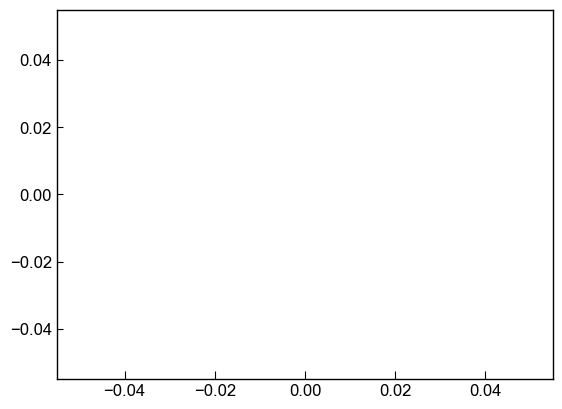

In [28]:
plt.plot(Opx_Cpx['T_K_x'].loc[Press_new&Eq_Mask]-273.15, IdealKd.loc[Press_new&Eq_Mask], '.r')


## Plot for paper

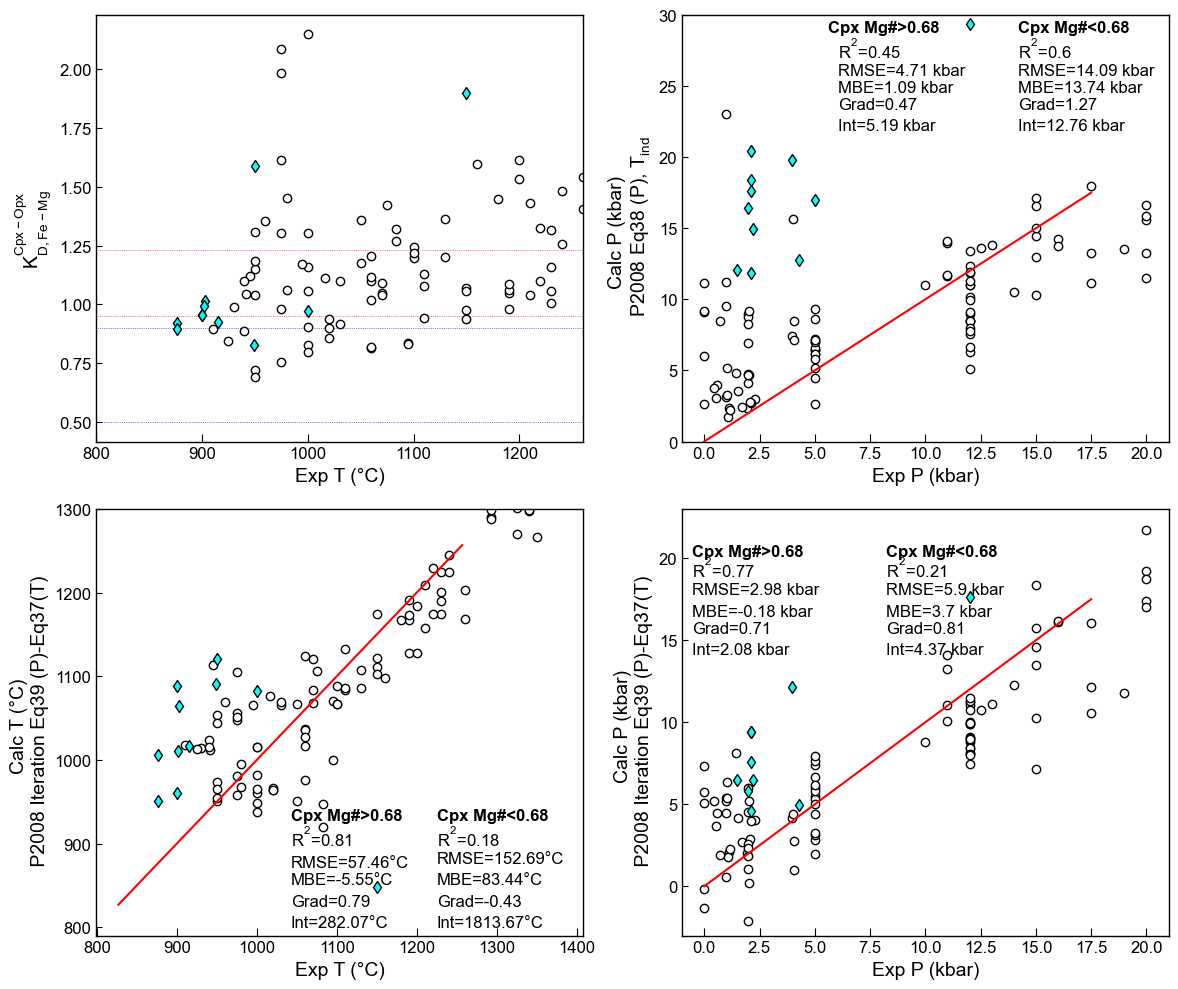

In [29]:
fig, ((ax0, ax3), (ax1, ax2)) = plt.subplots(2,2, figsize = (12,10)) # adjust dimensions of figure here
## aX3 FROM OTHER FIGURE

NoCr=~(Opx_Cpx['Cr2O3_Opx']>0)


ax3.plot(Opx_Cpx['P_kbar_x'].loc[Press_new&(Eq_Mask)&HighCpxMgno],
         Out_38_36['P_kbar_calc'].loc[Press_new&(Eq_Mask)&HighCpxMgno],
         'ok', mfc='white')

ax3.plot(Opx_Cpx['P_kbar_x'].loc[Press_new&(Eq_Mask)&(~HighCpxMgno)],
         Out_38_36['P_kbar_calc'].loc[Press_new&(Eq_Mask)&(~HighCpxMgno)],
         'dk', mfc='cyan')


# ax3.plot(Opx_Cpx['P_kbar_x'].loc[Press_new&(Eq_Mask)&NoCr],
#          Out_38_36['P_kbar_calc'].loc[Press_new&(Eq_Mask)&NoCr],
#          'sk', mfc='red')




Stats_3836_highMgno=pt.calculate_R2(Opx_Cpx['P_kbar_x'].loc[Press_new&(Eq_Mask)&HighCpxMgno],
         Out_38_36['P_kbar_calc'].loc[Press_new&(Eq_Mask)&HighCpxMgno], xy=False, df=True)
ycoord=0.7
ax3.annotate("Cpx Mg#>0.68", xy=(0.3, 0.26+ycoord),
xycoords="axes fraction", fontsize=12, fontweight='bold')
ax3.annotate("R$^{2}$="+str(Stats_3836_highMgno['R2'].iloc[0]), xy=(0.32, 0.20+ycoord),
xycoords="axes fraction", fontsize=12)
ax3.annotate("RMSE="+str(Stats_3836_highMgno['RMSE'].iloc[0]) + ' kbar', xy=(0.32, 0.16+ycoord),
xycoords="axes fraction", fontsize=12)
ax3.annotate("MBE="+str(Stats_3836_highMgno['Mean'].iloc[0]) + ' kbar', xy=(0.32, 0.12+ycoord),
xycoords="axes fraction", fontsize=12)
ax3.annotate("Grad="+str(Stats_3836_highMgno['Grad'].iloc[0]), xy=(0.32, 0.08+ycoord),
xycoords="axes fraction", fontsize=12)
ax3.annotate("Int="+str(Stats_3836_highMgno['Int'].iloc[0]) + ' kbar', xy=(0.32, 0.03+ycoord),
xycoords="axes fraction", fontsize=12)

Stats_3836_lowMgno=pt.calculate_R2(Opx_Cpx['P_kbar_x'].loc[Press_new&(Eq_Mask)&(~HighCpxMgno)],
         Out_38_36['P_kbar_calc'].loc[Press_new&(Eq_Mask)&(~HighCpxMgno)], xy=False, df=True)

x_offset=0.09
ax3.annotate("Cpx Mg#<0.68", xy=(0.6+x_offset, 0.26+ycoord),
xycoords="axes fraction", fontsize=12, fontweight='bold')
ax3.annotate("R$^{2}$="+str(Stats_3836_lowMgno['R2'].iloc[0]), xy=(0.6+x_offset, 0.20+ycoord),
xycoords="axes fraction", fontsize=12)
ax3.annotate("RMSE="+str(Stats_3836_lowMgno['RMSE'].iloc[0]) + ' kbar', xy=(0.6+x_offset, 0.16+ycoord),
xycoords="axes fraction", fontsize=12)
ax3.annotate("MBE="+str(Stats_3836_lowMgno['Mean'].iloc[0]) + ' kbar', xy=(0.6+x_offset, 0.12+ycoord),
xycoords="axes fraction", fontsize=12)
ax3.annotate("Grad="+str(Stats_3836_lowMgno['Grad'].iloc[0]), xy=(0.6+x_offset, 0.08+ycoord),
xycoords="axes fraction", fontsize=12)
ax3.annotate("Int="+str(Stats_3836_lowMgno['Int'].iloc[0]) + ' kbar', xy=(0.6+x_offset, 0.03+ycoord),
xycoords="axes fraction", fontsize=12)
ax3.plot([0, 17.5], [0, 17.5], '-r')


ax3.set_xlabel('Exp P (kbar)')
ax3.set_ylabel('Calc P (kbar) \n P2008 Eq38 (P), T$_{ind}$')

### OTHER PARTS

ax0.plot([800, 1260], [1.09+0.14, 1.09+0.14], ':r', lw=0.5)
ax0.plot([800, 1260], [1.09-0.14, 1.09-0.14], ':r', lw=0.5)
ax0.plot([800, 1260], [0.7+0.2, 0.7+0.2], ':b', lw=0.5)
ax0.plot([800, 1260], [0.7-0.2, 0.7-0.2], ':b', lw=0.5)
ax0.set_xlim([800, 1260])

ax0.plot(Opx_Cpx['T_K_x'].loc[Press_new&Eq_Mask&HighCpxMgno]-273.15, 
eq_tests['Kd_Fe_Mg_Cpx_Opx'].loc[Press_new&Eq_Mask&HighCpxMgno], 'ok', mfc='white')

ax0.plot(Opx_Cpx['T_K_x'].loc[Press_new&Eq_Mask&(~HighCpxMgno)]-273.15, 
eq_tests['Kd_Fe_Mg_Cpx_Opx'].loc[Press_new&Eq_Mask&(~HighCpxMgno)], 'dk', mfc='cyan')


ax0.plot(Opx_Cpx['T_K_x'].loc[Press_new&Eq_Mask]-273.15, IdealKd.loc[Press_new&Eq_Mask], '.r')

## Temperature Assesment


ax1.plot(Opx_Cpx['T_K_x'].loc[Press_new&(Eq_Mask)&HighCpxMgno]-273.15,
         Out_39_37['T_K_calc'].loc[Press_new&(Eq_Mask)&HighCpxMgno]-273.15,
         'ok', mfc='white')

ax1.plot(Opx_Cpx['T_K_x'].loc[Press_new&(Eq_Mask)&(~HighCpxMgno)]-273.15,
         Out_39_37['T_K_calc'].loc[Press_new&(Eq_Mask)&(~HighCpxMgno)]-273.15,
         'dk', mfc='cyan')


ax1.plot([1100-273.15, 1530-273.15], [1100-273.15, 1530-273.15], '-r')

Stats_3937_highMgno=pt.calculate_R2(Opx_Cpx['T_K_x'].loc[Press_new&(Eq_Mask)&HighCpxMgno],
         Out_39_37['T_K_calc'].loc[Press_new&(Eq_Mask)&HighCpxMgno], xy=False, df=True, round=2)

ax1.annotate("Cpx Mg#>0.68", xy=(0.4, 0.27),
xycoords="axes fraction", fontsize=12, fontweight='bold')
ax1.annotate("R$^{2}$="+str(Stats_3937_highMgno['R2'].iloc[0]), xy=(0.4, 0.21),
xycoords="axes fraction", fontsize=12)
ax1.annotate("RMSE="+str(Stats_3937_highMgno['RMSE'].iloc[0])+'°C', xy=(0.4, 0.16),
xycoords="axes fraction", fontsize=12)
ax1.annotate("MBE="+str(Stats_3937_highMgno['Mean'].iloc[0])+'°C', xy=(0.4, 0.12),
xycoords="axes fraction", fontsize=12)
ax1.annotate("Grad="+str(Stats_3937_highMgno['Grad'].iloc[0]), xy=(0.4, 0.07),
xycoords="axes fraction", fontsize=12)
ax1.annotate("Int="+str(Stats_3937_highMgno['Int'].iloc[0])+'°C', xy=(0.4, 0.02),
xycoords="axes fraction", fontsize=12)

Stats_3937_lowMgno=pt.calculate_R2(Opx_Cpx['T_K_x'].loc[Press_new&(Eq_Mask)&(~HighCpxMgno)],
         Out_39_37['T_K_calc'].loc[Press_new&(Eq_Mask)&(~HighCpxMgno)], xy=False, df=True, round=2)

ax1.annotate("Cpx Mg#<0.68", xy=(0.7, 0.27),
xycoords="axes fraction", fontsize=12, fontweight='bold')
ax1.annotate("R$^{2}$="+str(Stats_3937_lowMgno['R2'].iloc[0]), xy=(0.7, 0.21),
xycoords="axes fraction", fontsize=12)
ax1.annotate("RMSE="+str(Stats_3937_lowMgno['RMSE'].iloc[0])+'°C', xy=(0.7, 0.17),
xycoords="axes fraction", fontsize=12)
ax1.annotate("MBE="+str(Stats_3937_lowMgno['Mean'].iloc[0])+'°C', xy=(0.7, 0.12),
xycoords="axes fraction", fontsize=12)
ax1.annotate("Grad="+str(Stats_3937_lowMgno['Grad'].iloc[0]), xy=(0.7, 0.07),
xycoords="axes fraction", fontsize=12)
ax1.annotate("Int="+str(Stats_3937_lowMgno['Int'].iloc[0])+'°C', xy=(0.7, 0.02),
xycoords="axes fraction", fontsize=12)

### Pressure testing

ax2.plot(Opx_Cpx['P_kbar_x'].loc[Press_new&(Eq_Mask)&HighCpxMgno],
         Out_39_37['P_kbar_calc'].loc[Press_new&(Eq_Mask)&HighCpxMgno],
         'ok', mfc='white')

ax2.plot(Opx_Cpx['P_kbar_x'].loc[Press_new&(Eq_Mask)&(~HighCpxMgno)],
         Out_39_37['P_kbar_calc'].loc[Press_new&(Eq_Mask)&(~HighCpxMgno)],
         'dk', mfc='cyan')



Stats_3937_highMgno=pt.calculate_R2(Opx_Cpx['P_kbar_x'].loc[Press_new&(Eq_Mask)&HighCpxMgno],
         Out_39_37['P_kbar_calc'].loc[Press_new&(Eq_Mask)&HighCpxMgno], xy=False, df=True, round=2)
ycoord=0.63
xoff=-0.18

ax2.annotate("Cpx Mg#>0.68", xy=(0.2+xoff, 0.26+ycoord),
xycoords="axes fraction", fontsize=12, fontweight='bold')
ax2.annotate("R$^{2}$="+str(Stats_3937_highMgno['R2'].iloc[0]), xy=(0.2+xoff, 0.21+ycoord),
xycoords="axes fraction", fontsize=12)
ax2.annotate("RMSE="+str(Stats_3937_highMgno['RMSE'].iloc[0]) + ' kbar', xy=(0.2+xoff, 0.17+ycoord),
xycoords="axes fraction", fontsize=12)
ax2.annotate("MBE="+str(Stats_3937_highMgno['Mean'].iloc[0]) + ' kbar', xy=(0.2+xoff, 0.12+ycoord),
xycoords="axes fraction", fontsize=12)
ax2.annotate("Grad="+str(Stats_3937_highMgno['Grad'].iloc[0]), xy=(0.2+xoff, 0.08+ycoord),
xycoords="axes fraction", fontsize=12)
ax2.annotate("Int="+str(Stats_3937_highMgno['Int'].iloc[0]) + ' kbar', xy=(0.2+xoff, 0.03+ycoord),
xycoords="axes fraction", fontsize=12)

Stats_3937_lowMgno=pt.calculate_R2(Opx_Cpx['P_kbar_x'].loc[Press_new&(Eq_Mask)&(~HighCpxMgno)],
         Out_39_37['P_kbar_calc'].loc[Press_new&(Eq_Mask)&(~HighCpxMgno)], xy=False, df=True)

ax2.annotate("Cpx Mg#<0.68", xy=(0.6+xoff, 0.26+ycoord),
xycoords="axes fraction", fontsize=12, fontweight='bold')
ax2.annotate("R$^{2}$="+str(Stats_3937_lowMgno['R2'].iloc[0]), xy=(0.6+xoff, 0.21+ycoord),
xycoords="axes fraction", fontsize=12)
ax2.annotate("RMSE="+str(Stats_3937_lowMgno['RMSE'].iloc[0]) + ' kbar', xy=(0.6+xoff, 0.17+ycoord),
xycoords="axes fraction", fontsize=12)
ax2.annotate("MBE="+str(Stats_3937_lowMgno['Mean'].iloc[0]) + ' kbar', xy=(0.6+xoff, 0.12+ycoord),
xycoords="axes fraction", fontsize=12)
ax2.annotate("Grad="+str(Stats_3937_lowMgno['Grad'].iloc[0]), xy=(0.6+xoff, 0.08+ycoord),
xycoords="axes fraction", fontsize=12)
ax2.annotate("Int="+str(Stats_3937_lowMgno['Int'].iloc[0]) + ' kbar', xy=(0.6+xoff, 0.03+ycoord),
xycoords="axes fraction", fontsize=12)
ax2.plot([0, 17.5], [0, 17.5], '-r')

ax0.set_xlabel('Exp T (°C)')
ax0.set_ylabel('K$_{D, Fe-Mg}^{Cpx-Opx}$')

ax1.set_xlabel('Exp T (°C)')
ax1.set_ylabel('Calc T (°C) \n P2008 Iteration Eq39 (P)-Eq37(T)')

ax2.set_xlabel('Exp P (kbar)')
ax2.set_ylabel('Calc P (kbar) \n P2008 Iteration Eq39 (P)-Eq37(T)')
ax1.set_ylim([790, 1300])
fig.tight_layout()
ax2.set_ylim([-3, 23])
ax3.set_ylim([0, 30])
fig.savefig('Opx_Cpx_Aug23.png', dpi=200)

In [30]:
## Missing ones to label
print('part b')
print(np.max(Out_38_36['P_kbar_calc'].loc[Press_new&(Eq_Mask)&(~HighCpxMgno)]))
print('part c')
print(np.max(Out_39_37['T_K_calc'].loc[Press_new&(Eq_Mask)&(HighCpxMgno)])-273.15)
print('part d)')
print(np.min(Out_39_37['P_kbar_calc'].loc[Press_new&(Eq_Mask)&(HighCpxMgno)]))
data = Out_39_37['P_kbar_calc'].loc[Press_new & (Eq_Mask) & (HighCpxMgno)]
min_value = np.min(data)

# Use np.partition to find the second smallest value
second_min_value = np.partition(data, 1)[1]
print('part d')
print(second_min_value)


part b
29.358039255765362
part c
1358.2810445781674
part d)
-2.142735747565033
part d
-1.309473532212603


## PLOTS E AND F FOR MAIN TEXT

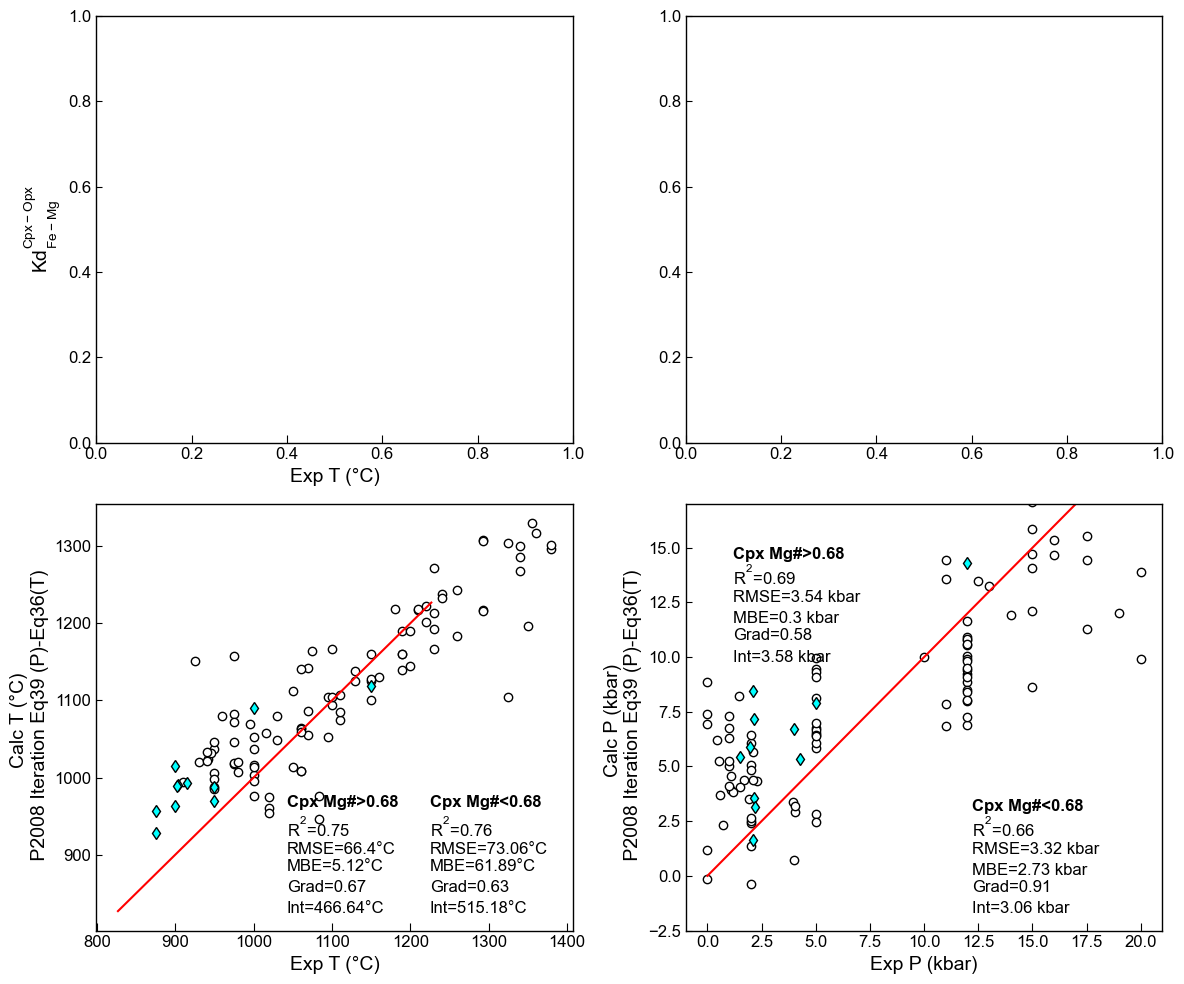

In [31]:
fig, ((ax0, ax3), (ax1, ax2)) = plt.subplots(2,2, figsize = (12,10)) # adjust dimensions of figure here





ax1.plot(Opx_Cpx['T_K_x'].loc[Press_new&(Eq_Mask)&HighCpxMgno]-273.15,
         Out_39_36['T_K_calc'].loc[Press_new&(Eq_Mask)&HighCpxMgno]-273.15,
         'ok', mfc='white')

ax1.plot(Opx_Cpx['T_K_x'].loc[Press_new&(Eq_Mask)&(~HighCpxMgno)]-273.15,
         Out_39_36['T_K_calc'].loc[Press_new&(Eq_Mask)&(~HighCpxMgno)]-273.15,
         'dk', mfc='cyan')


ax1.plot([1100-273.15, 1500-273.15], [1100-273.15, 1500-273.15], '-r')

Stats_3936_highMgno=pt.calculate_R2(Opx_Cpx['T_K_x'].loc[Press_new&(Eq_Mask)&HighCpxMgno],
         Out_39_36['T_K_calc'].loc[Press_new&(Eq_Mask)&HighCpxMgno], xy=False, df=True)

yoffset=0.02
ax1.annotate("Cpx Mg#>0.68", xy=(0.4, 0.26+yoffset+0.01),
xycoords="axes fraction", fontsize=12, fontweight='bold')
ax1.annotate("R$^{2}$="+str(Stats_3936_highMgno['R2'].iloc[0]), xy=(0.4, 0.20+yoffset),
xycoords="axes fraction", fontsize=12)
ax1.annotate("RMSE="+str(Stats_3936_highMgno['RMSE'].iloc[0])+'°C', xy=(0.4, 0.16+yoffset),
xycoords="axes fraction", fontsize=12)
ax1.annotate("MBE="+str(Stats_3936_highMgno['Mean'].iloc[0])+'°C', xy=(0.4, 0.12+yoffset),
xycoords="axes fraction", fontsize=12)
ax1.annotate("Grad="+str(Stats_3936_highMgno['Grad'].iloc[0]), xy=(0.4, 0.07+yoffset),
xycoords="axes fraction", fontsize=12)
ax1.annotate("Int="+str(Stats_3936_highMgno['Int'].iloc[0])+'°C', xy=(0.4, 0.02+yoffset),
xycoords="axes fraction", fontsize=12)

Stats_3936_lowMgno=pt.calculate_R2(Opx_Cpx['T_K_x'].loc[Press_new&(Eq_Mask)&(~HighCpxMgno)],
         Out_39_36['T_K_calc'].loc[Press_new&(Eq_Mask)&(~HighCpxMgno)], xy=False, df=True)

ax1.annotate("Cpx Mg#<0.68", xy=(0.7, 0.26+yoffset+0.01),
xycoords="axes fraction", fontsize=12, fontweight='bold')
ax1.annotate("R$^{2}$="+str(Stats_3936_lowMgno['R2'].iloc[0]), xy=(0.7, 0.20+yoffset),
xycoords="axes fraction", fontsize=12)
ax1.annotate("RMSE="+str(Stats_3936_lowMgno['RMSE'].iloc[0])+'°C', xy=(0.7, 0.16+yoffset),
xycoords="axes fraction", fontsize=12)
ax1.annotate("MBE="+str(Stats_3936_lowMgno['Mean'].iloc[0])+'°C', xy=(0.7, 0.12+yoffset),
xycoords="axes fraction", fontsize=12)
ax1.annotate("Grad="+str(Stats_3936_lowMgno['Grad'].iloc[0]), xy=(0.7, 0.07+yoffset),
xycoords="axes fraction", fontsize=12)
ax1.annotate("Int="+str(Stats_3936_lowMgno['Int'].iloc[0])+'°C', xy=(0.7, 0.02+yoffset),
xycoords="axes fraction", fontsize=12)

### Pressure testing

ax2.plot(Opx_Cpx['P_kbar_x'].loc[Press_new&(Eq_Mask)&HighCpxMgno],
         Out_39_36['P_kbar_calc'].loc[Press_new&(Eq_Mask)&HighCpxMgno],
         'ok', mfc='white')

ax2.plot(Opx_Cpx['P_kbar_x'].loc[Press_new&(Eq_Mask)&(~HighCpxMgno)],
         Out_39_36['P_kbar_calc'].loc[Press_new&(Eq_Mask)&(~HighCpxMgno)],
         'dk', mfc='cyan')



Stats_3936_highMgno=pt.calculate_R2(Opx_Cpx['P_kbar_x'].loc[Press_new&(Eq_Mask)&HighCpxMgno],
         Out_39_36['P_kbar_calc'].loc[Press_new&(Eq_Mask)&HighCpxMgno], xy=False, df=True)
ycoord=0.6
ax2.annotate("Cpx Mg#>0.68", xy=(0.1, 0.26+ycoord+0.01),
xycoords="axes fraction", fontsize=12, fontweight='bold')
ax2.annotate("R$^{2}$="+str(Stats_3936_highMgno['R2'].iloc[0]), xy=(0.1, 0.21+ycoord),
xycoords="axes fraction", fontsize=12)
ax2.annotate("RMSE="+str(Stats_3936_highMgno['RMSE'].iloc[0]) + ' kbar', xy=(0.1, 0.17+ycoord),
xycoords="axes fraction", fontsize=12)
ax2.annotate("MBE="+str(Stats_3936_highMgno['Mean'].iloc[0]) + ' kbar', xy=(0.1, 0.12+ycoord),
xycoords="axes fraction", fontsize=12)
ax2.annotate("Grad="+str(Stats_3936_highMgno['Grad'].iloc[0]), xy=(0.1, 0.08+ycoord),
xycoords="axes fraction", fontsize=12)
ax2.annotate("Int="+str(Stats_3936_highMgno['Int'].iloc[0]) + ' kbar', xy=(0.1, 0.03+ycoord),
xycoords="axes fraction", fontsize=12)

Stats_3936_lowMgno=pt.calculate_R2(Opx_Cpx['P_kbar_x'].loc[Press_new&(Eq_Mask)&(~HighCpxMgno)],
         Out_39_36['P_kbar_calc'].loc[Press_new&(Eq_Mask)&(~HighCpxMgno)], xy=False, df=True)

x_offset=0.0
ycoord=0.01
ax2.annotate("Cpx Mg#<0.68", xy=(0.6+x_offset, 0.26+ycoord+0.01),
xycoords="axes fraction", fontsize=12, fontweight='bold')
ax2.annotate("R$^{2}$="+str(Stats_3936_lowMgno['R2'].iloc[0]), xy=(0.6+x_offset, 0.21+ycoord),
xycoords="axes fraction", fontsize=12)
ax2.annotate("RMSE="+str(Stats_3936_lowMgno['RMSE'].iloc[0]) + ' kbar', xy=(0.6+x_offset, 0.17+ycoord),
xycoords="axes fraction", fontsize=12)
ax2.annotate("MBE="+str(Stats_3936_lowMgno['Mean'].iloc[0]) + ' kbar', xy=(0.6+x_offset, 0.12+ycoord),
xycoords="axes fraction", fontsize=12)
ax2.annotate("Grad="+str(Stats_3936_lowMgno['Grad'].iloc[0]), xy=(0.6+x_offset, 0.08+ycoord),
xycoords="axes fraction", fontsize=12)
ax2.annotate("Int="+str(Stats_3936_lowMgno['Int'].iloc[0]) + ' kbar', xy=(0.6+x_offset, 0.03+ycoord),
xycoords="axes fraction", fontsize=12)
ax2.plot([0, 17.5], [0, 17.5], '-r')

ax0.set_xlabel('Exp T (°C)')
ax0.set_ylabel('Kd$_{Fe-Mg}^{Cpx-Opx}$')

ax1.set_xlabel('Exp T (°C)')
ax1.set_ylabel('Calc T (°C) \n P2008 Iteration Eq39 (P)-Eq36(T)')

ax2.set_xlabel('Exp P (kbar)')
ax2.set_ylabel('Calc P (kbar) \n P2008 Iteration Eq39 (P)-Eq36(T)')
fig.tight_layout()
ax2.set_ylim([-2.5, 17])
fig.savefig('Opx_Cpx_eq36_partII_Aug23.png', dpi=200)

In [32]:
minP=(Out_39_36['P_kbar_calc'].loc[Press_new&(Eq_Mask)&(HighCpxMgno)])<-10
Out_39_36['P_kbar_calc'].loc[Press_new&(Eq_Mask)&(HighCpxMgno)&minP]

Series([], Name: P_kbar_calc, dtype: float64)

C:\Users\penny\AppData\Local\Temp\ipykernel_15184\1821952730.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eq_tests_trim['Disc with T']= (Opx_Cpx['T_K_x'].loc[Press_new&(Eq_Mask)]


ValueError: could not convert string to float: 'Y'

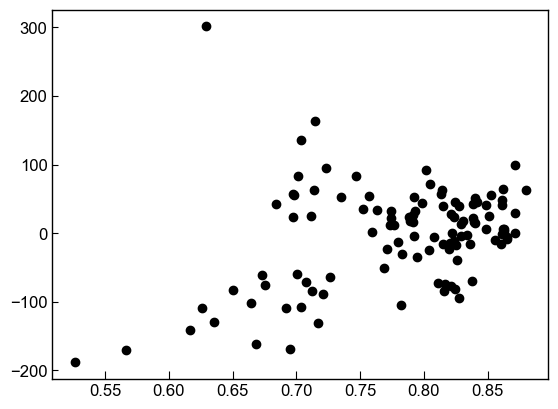

In [33]:
Opx_Cpx_trim=Opx_Cpx.loc[Press_new&(Eq_Mask)]
eq_tests_trim=eq_tests.loc[Press_new&(Eq_Mask)]

plt.plot(eq_tests_trim['Mgno_Cpx'], 
         Opx_Cpx['T_K_x'].loc[Press_new&(Eq_Mask)]
         -Out_39_37['T_K_calc'].loc[Press_new&(Eq_Mask)],
         'ok')



import seaborn as sns
eq_tests_trim['Disc with T']= (Opx_Cpx['T_K_x'].loc[Press_new&(Eq_Mask)]
         -Out_39_37['T_K_calc'].loc[Press_new&(Eq_Mask)])
corrmat = eq_tests_trim.corr()
f, ax = plt.subplots(figsize=(30, 30))
x1=corrmat[['Disc with T']]
sns.heatmap(x1**2, vmax=.8, square=True, vmin=-1, center= 0, cmap= 'coolwarm', annot=True, annot_kws={"size":8});

## Offset vs. Mg# in Cpx

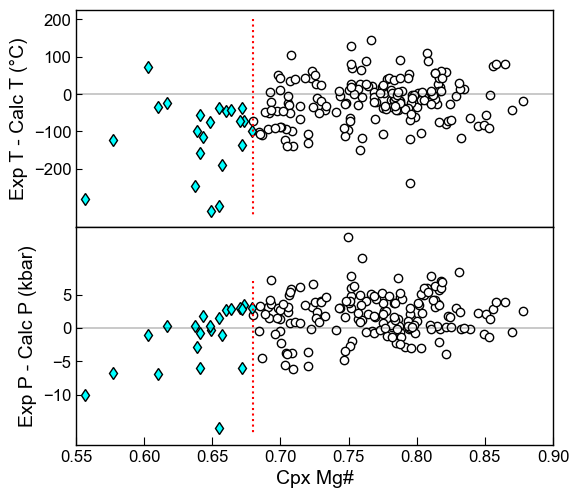

In [ ]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize = (6*1.026,5*1.13)) # adjust dimensions of figure here
ax1.axes.get_xaxis().set_visible(False)
plt.subplots_adjust(wspace=0, hspace=0)

ax1.plot(eq_tests_trim['Mgno_Cpx'].loc[HighCpxMgno], 
         Opx_Cpx['T_K_x'].loc[Press_new&(Eq_Mask)&(HighCpxMgno)]
         -Out_39_37['T_K_calc'].loc[Press_new&(Eq_Mask)&(HighCpxMgno)],
         'ok', mfc='white')
ax1.set_yticks([200, 100, 0, -100, -200])

ax2.plot(eq_tests_trim['Mgno_Cpx'].loc[HighCpxMgno], 
         Opx_Cpx['P_kbar_x'].loc[Press_new&(Eq_Mask)&(HighCpxMgno)]
         -Out_39_37['P_kbar_calc'].loc[Press_new&(Eq_Mask)&(HighCpxMgno)],
         'ok', mfc='white')


ax1.plot(eq_tests_trim['Mgno_Cpx'].loc[~HighCpxMgno], 
         Opx_Cpx['T_K_x'].loc[Press_new&(Eq_Mask)&(~HighCpxMgno)]
         -Out_39_37['T_K_calc'].loc[Press_new&(Eq_Mask)&(~HighCpxMgno)],
         'dk', mfc='cyan')
ax1.set_yticks([200, 100, 0, -100, -200])

ax2.plot(eq_tests_trim['Mgno_Cpx'].loc[~HighCpxMgno], 
         Opx_Cpx['P_kbar_x'].loc[Press_new&(Eq_Mask)&(~HighCpxMgno)]
         -Out_39_37['P_kbar_calc'].loc[Press_new&(Eq_Mask)&(~HighCpxMgno)],
         'dk', mfc='cyan')

ax2.set_yticks([5, 0, -5, -10])
ax2.set_ylabel('Exp P - Calc P (kbar)')
ax1.set_ylabel('Exp T - Calc T (°C)')
ax2.set_xlabel('Cpx Mg#')
ax1.plot([0.68, 0.68], [200, -330], ':r') 
ax2.plot([0.68, 0.68], [7, -16], ':r') 
ax1.plot([0.55, 0.9], [0, 0], '-k', lw=0.3)
ax2.plot([0.55, 0.9], [0, 0], '-k', lw=0.3)
ax1.set_xlim([0.55, 0.9])
ax2.set_xlim([0.55, 0.9])
fig.savefig('Offset_Cpx_Opx.png', dpi=200)

## Temperature instead

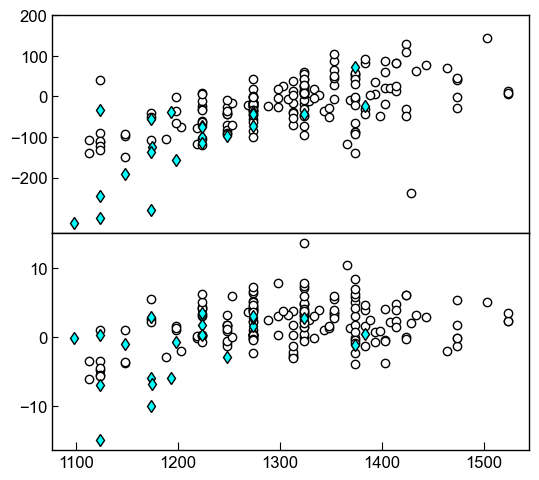

In [ ]:


fig, (ax1, ax2) = plt.subplots(2,1, figsize = (6*1.026,5*1.13)) # adjust dimensions of figure here
ax1.axes.get_xaxis().set_visible(False)
plt.subplots_adjust(wspace=0, hspace=0)

ax1.plot(Opx_Cpx['T_K_x'].loc[Press_new&(Eq_Mask)&(HighCpxMgno)], 
         Opx_Cpx['T_K_x'].loc[Press_new&(Eq_Mask)&(HighCpxMgno)]
         -Out_39_37['T_K_calc'].loc[Press_new&(Eq_Mask)&(HighCpxMgno)],
         'ok', mfc='white')
ax1.set_yticks([200, 100, 0, -100, -200])

ax2.plot(Opx_Cpx['T_K_x'].loc[Press_new&(Eq_Mask)&(HighCpxMgno)], 
         Opx_Cpx['P_kbar_x'].loc[Press_new&(Eq_Mask)&(HighCpxMgno)]
         -Out_39_37['P_kbar_calc'].loc[Press_new&(Eq_Mask)&(HighCpxMgno)],
         'ok', mfc='white')


ax1.plot(Opx_Cpx['T_K_x'].loc[Press_new&(Eq_Mask)&(~HighCpxMgno)], 
         Opx_Cpx['T_K_x'].loc[Press_new&(Eq_Mask)&(~HighCpxMgno)]
         -Out_39_37['T_K_calc'].loc[Press_new&(Eq_Mask)&(~HighCpxMgno)],
         'dk', mfc='cyan')
ax1.set_yticks([200, 100, 0, -100, -200])

ax2.plot(Opx_Cpx['T_K_x'].loc[Press_new&(Eq_Mask)&(~HighCpxMgno)], 
         Opx_Cpx['P_kbar_x'].loc[Press_new&(Eq_Mask)&(~HighCpxMgno)]
         -Out_39_37['P_kbar_calc'].loc[Press_new&(Eq_Mask)&(~HighCpxMgno)],
         'dk', mfc='cyan')

# ax2.set_yticks([5, 0, -5, -10])
# ax2.set_ylabel('Exp P - Calc P (kbar)')
# ax1.set_ylabel('Exp T - Calc T ((°C)')
# ax2.set_xlabel('Cpx Mg#')
# ax1.plot([0.68, 0.68], [200, -330], ':r') 
# ax2.plot([0.68, 0.68], [7, -16], ':r') 

fig.savefig('Offset_Cpx_Opx.png', dpi=200)

## Water instead

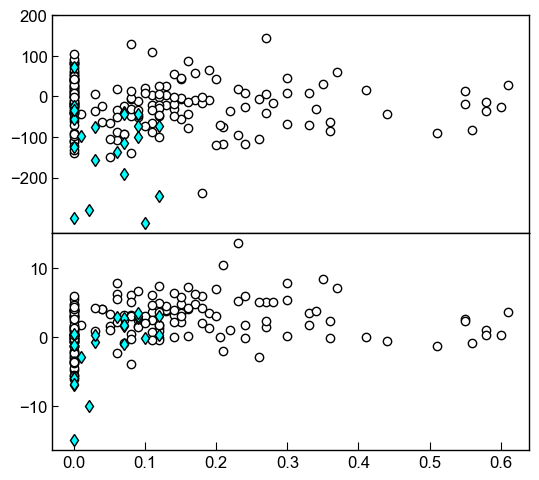

In [ ]:


fig, (ax1, ax2) = plt.subplots(2,1, figsize = (6*1.026,5*1.13)) # adjust dimensions of figure here
ax1.axes.get_xaxis().set_visible(False)
plt.subplots_adjust(wspace=0, hspace=0)
x='Cr2O3_Cpx'
ax1.plot(Opx_Cpx[x].loc[Press_new&(Eq_Mask)&(HighCpxMgno)], 
         Opx_Cpx['T_K_x'].loc[Press_new&(Eq_Mask)&(HighCpxMgno)]
         -Out_39_37['T_K_calc'].loc[Press_new&(Eq_Mask)&(HighCpxMgno)],
         'ok', mfc='white')
ax1.set_yticks([200, 100, 0, -100, -200])

ax2.plot(Opx_Cpx[x].loc[Press_new&(Eq_Mask)&(HighCpxMgno)], 
         Opx_Cpx['P_kbar_x'].loc[Press_new&(Eq_Mask)&(HighCpxMgno)]
         -Out_39_37['P_kbar_calc'].loc[Press_new&(Eq_Mask)&(HighCpxMgno)],
         'ok', mfc='white')


ax1.plot(Opx_Cpx[x].loc[Press_new&(Eq_Mask)&(~HighCpxMgno)], 
         Opx_Cpx['T_K_x'].loc[Press_new&(Eq_Mask)&(~HighCpxMgno)]
         -Out_39_37['T_K_calc'].loc[Press_new&(Eq_Mask)&(~HighCpxMgno)],
         'dk', mfc='cyan')
ax1.set_yticks([200, 100, 0, -100, -200])

ax2.plot(Opx_Cpx[x].loc[Press_new&(Eq_Mask)&(~HighCpxMgno)], 
         Opx_Cpx['P_kbar_x'].loc[Press_new&(Eq_Mask)&(~HighCpxMgno)]
         -Out_39_37['P_kbar_calc'].loc[Press_new&(Eq_Mask)&(~HighCpxMgno)],
         'dk', mfc='cyan')

# ax2.set_yticks([5, 0, -5, -10])
# ax2.set_ylabel('Exp P - Calc P (kbar)')
# ax1.set_ylabel('Exp T - Calc T ((°C)')
# ax2.set_xlabel('Cpx Mg#')
# ax1.plot([0.68, 0.68], [200, -330], ':r') 
# ax2.plot([0.68, 0.68], [7, -16], ':r') 

fig.savefig('Offset_Cpx_Opx.png', dpi=200)

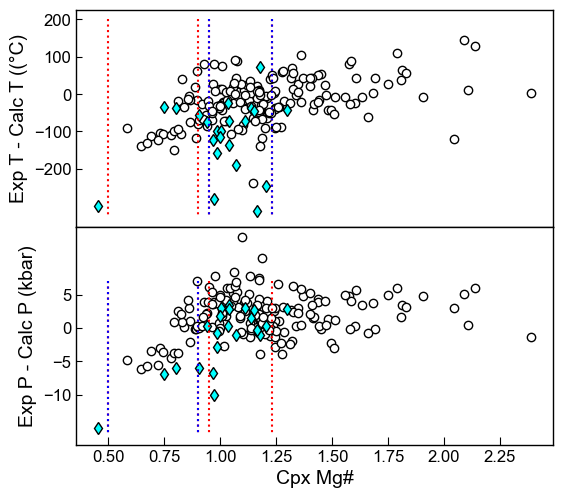

In [ ]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize = (6*1.026,5*1.13)) # adjust dimensions of figure here
ax1.axes.get_xaxis().set_visible(False)
plt.subplots_adjust(wspace=0, hspace=0)

ax1.plot(eq_tests_trim['Kd_Fe_Mg_Cpx_Opx'].loc[HighCpxMgno], 
         Opx_Cpx['T_K_x'].loc[Press_new&(Eq_Mask)&(HighCpxMgno)]
         -Out_39_37['T_K_calc'].loc[Press_new&(Eq_Mask)&(HighCpxMgno)],
         'ok', mfc='white')
ax1.set_yticks([200, 100, 0, -100, -200])

ax2.plot(eq_tests_trim['Kd_Fe_Mg_Cpx_Opx'].loc[HighCpxMgno], 
         Opx_Cpx['P_kbar_x'].loc[Press_new&(Eq_Mask)&(HighCpxMgno)]
         -Out_39_37['P_kbar_calc'].loc[Press_new&(Eq_Mask)&(HighCpxMgno)],
         'ok', mfc='white')


ax1.plot(eq_tests_trim['Kd_Fe_Mg_Cpx_Opx'].loc[~HighCpxMgno], 
         Opx_Cpx['T_K_x'].loc[Press_new&(Eq_Mask)&(~HighCpxMgno)]
         -Out_39_37['T_K_calc'].loc[Press_new&(Eq_Mask)&(~HighCpxMgno)],
         'dk', mfc='cyan')
ax1.set_yticks([200, 100, 0, -100, -200])

ax2.plot(eq_tests_trim['Kd_Fe_Mg_Cpx_Opx'].loc[~HighCpxMgno], 
         Opx_Cpx['P_kbar_x'].loc[Press_new&(Eq_Mask)&(~HighCpxMgno)]
         -Out_39_37['P_kbar_calc'].loc[Press_new&(Eq_Mask)&(~HighCpxMgno)],
         'dk', mfc='cyan')

ax2.set_yticks([5, 0, -5, -10])
ax2.set_ylabel('Exp P - Calc P (kbar)')
ax1.set_ylabel('Exp T - Calc T ((°C)')
ax2.set_xlabel('Cpx Mg#')
ax1.plot([1.09+0.14, 1.09+0.14], [200, -330], ':r') 
ax1.plot([1.09-0.14, 1.09-0.14], [200, -330], ':r') 

ax2.plot([1.09+0.14, 1.09+0.14], [7, -16], ':r') 
ax2.plot([1.09-0.14, 1.09-0.14], [7, -16], ':r') 

ax1.plot([0.5, 0.5], [200, -330], ':r') 
ax1.plot([0.9, 0.9], [200, -330], ':r') 

ax2.plot([0.5, 0.5], [7, -16], ':r') 
ax2.plot([0.9, 0.9], [7, -16], ':r') 



ax1.plot([1.09+0.14, 1.09+0.14], [200, -330], ':b') 
ax1.plot([1.09-0.14, 1.09-0.14], [200, -330], ':b') 

ax2.plot([0.5, 0.5], [7, -16], ':b') 
ax2.plot([0.9, 0.9], [7, -16], ':b') 

fig.savefig('Offset_Cpx_Opx_withKdMg.png', dpi=200)